# Images Deblur: Full Trained Deblur GAN
### APMA4990 Final Project 

Original paper: [Deblur GAN](https://arxiv.org/pdf/1711.07064.pdf)

This is an **implementation, improvement and evaluation** of the original paper for images deblurring based on GANs. Our model is trained and used for our image deblurring application on Pythonanywhere.com

#### Our tasks 
**Implementation** of DeblurGAN in Tensorflow to deblur images;

**Comparison and explanations** of loss functions (lambda, partition);

**Sensitivity** of different pretrained models when calculating the content loss;

**Exploration** of different training procedures to save time;

Quantitative and visual **Evaluation** of the generalization and improvement of the trained model;

---------------------------------------------------------------------------------------------------------------------------------------------
By
#### Columbia University

Shan Guan sg3506

Yiyi Zhang yz3280

Yilin Lyu yl3832

Liangliang Huang lh2863


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import tensorflow as tf
from __future__ import print_function
import numpy as np
from model_tf import deblur_model
import argparse
from utils import load_images, load_own_images, deprocess_image, preprocess_image
import os
import h5py
import matplotlib.pyplot as plt
from PIL import Image

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
parser = argparse.ArgumentParser(description="deblur train")
parser.add_argument("--g_input_size", help="Generator input size of the image", default=256,type=int)
parser.add_argument('--output_nc', type=int, default=3, help='# of output image channels')
parser.add_argument('--ngf', type=int, default=64, help='# of gen filters in first conv layer')
parser.add_argument('--ndf', type=int, default=64, help='# of discrim filters in first conv layer')
parser.add_argument('--n_downsampling', type=int, default=2, help='# of downsampling in generator')
parser.add_argument('--n_blocks_gen', type=int, default=9, help='# of res block in generator')
parser.add_argument('--d_input_size', type=int, default=256, help='Generator input size')
parser.add_argument('--kernel_size', type=int, default=4, help='kernel size factor in discriminator')
parser.add_argument('--n_layers_D', type=int, default=3, help='only used if which_model_netD==n_layers')
parser.add_argument('--LAMBDA_A', default=100000, type=int, help='The lambda for preceptual loss')
parser.add_argument('--g_train_num', default=0, type=int, help='Train the generator for x epoch before adding discriminator')

param = parser.parse_args(args='')
tf.reset_default_graph()
model = deblur_model(param)

## The GAN model Architecture 
**Generator network: ** *(ResNet)*

Input: blurred image; 

Output: Estimate of the sharp image (Deblured image)

**Discriminator networks: ** *(Multilayer perceptron)*

During the training time, the critic network takes restored and sharp image as an input and estimates a distance between them.

Loss Function: 

Total loss consists of WGAN loss from critic and perceptual loss 

<img src='./images/ipynb_images/total_loss.png'>

<img src='./images/ipynb_images/model_arc.png'>

## 1. Train model-demo

In [3]:
image_dir = './images'
train_data=load_images(os.path.join(image_dir, "train"), n_images=-1)

In [6]:
# The model training here using a small dataset which including 24 pictures,
# To train the full model please use the full GoPro dataset
# To manage data, see the README.md
model.train(train_data, 
            batch_size=2, 
            pre_trained_model=None, 
            save_freq = 200,
            epoch_num = 10,
            generate_image_freq = 50)

10/12 batch in 1/10 epochs, discriminator loss: 3.8570871353149414, generator loss: 0.9310964941978455
8/12 batch in 2/10 epochs, discriminator loss: 2.2369067668914795, generator loss: 0.6646406054496765
6/12 batch in 3/10 epochs, discriminator loss: 2.4102823734283447, generator loss: 0.4835439920425415
4/12 batch in 4/10 epochs, discriminator loss: 1.2434515953063965, generator loss: 0.472316175699234
2/12 batch in 5/10 epochs, discriminator loss: 0.9978889226913452, generator loss: 0.4795484244823456
image saved to deblur_train/Deblur_1525878301
12/12 batch in 5/10 epochs, discriminator loss: 1.370950698852539, generator loss: 0.3241066336631775
10/12 batch in 6/10 epochs, discriminator loss: 1.3270421028137207, generator loss: 0.3065028488636017
8/12 batch in 7/10 epochs, discriminator loss: 0.8592190742492676, generator loss: 0.3730468451976776
6/12 batch in 8/10 epochs, discriminator loss: 0.8049578070640564, generator loss: 0.3833147883415222
4/12 batch in 9/10 epochs, discrimi

## 2. Test model
Evaluation Metrics: **PSNR** (Peak Signal to Noise Ratio)

Greater value means better deblur result.


In [7]:
# Set numbers of images to test 
test_data = load_images(os.path.join(image_dir, "test"), n_images=200)

In [8]:
# please replace your model name
model_name='Deblur_1525567719'
test_deblured_img = model.generate(test_data, batch_size=2, trained_model=model_name, save=False)

Load the model from: Deblur_1525567719
INFO:tensorflow:Restoring parameters from model/Deblur_1525567719
Model restored.
PSNR of testing data: 26.76833729496825


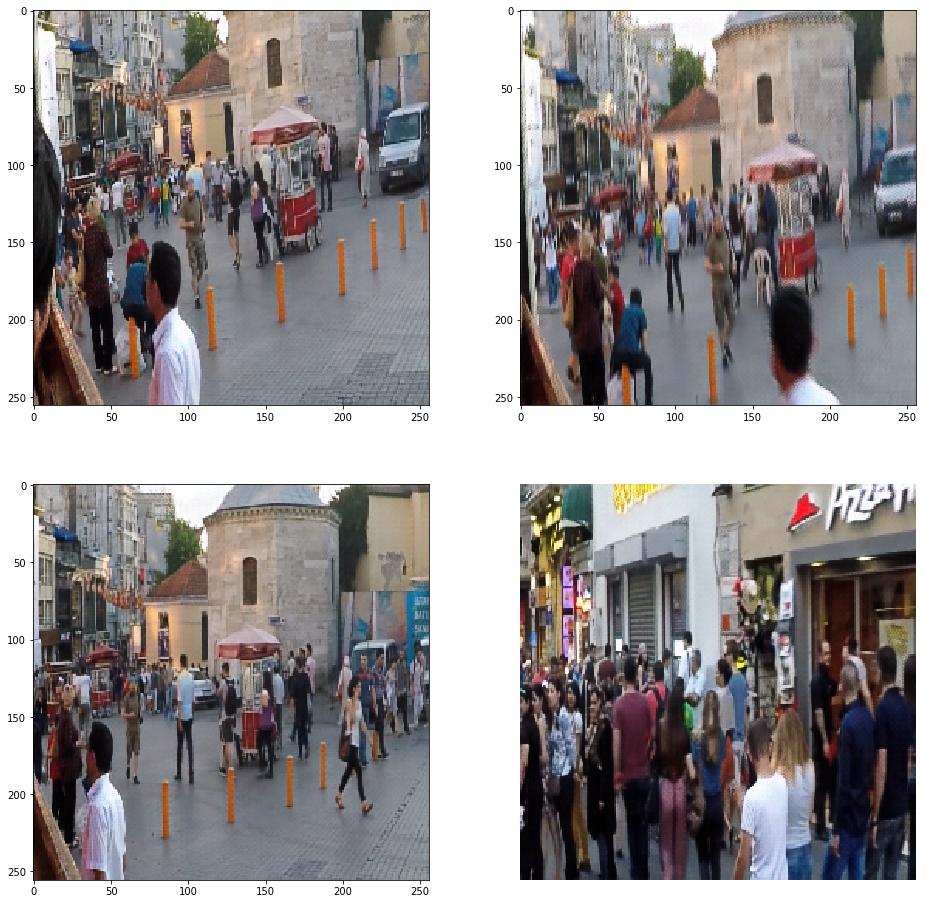

In [9]:
num_show = 4
mask = np.random.choice(test_deblured_img.shape[0], num_show, replace=False)
X_show = test_deblured_img[mask,:,:,:]
r = 2
f, axarr = plt.subplots(r, r, figsize=(16,16))
plt.axis("off")
for i in range(r):
    for j in range(r):
        #print(image.shape)
        image = X_show[r*i+j]
        axarr[i][j].imshow(image)

## 3. Results and model comparations 
PSNR: Peak Signal to Noise Ratio:[Wiki](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)

Using the PSNR metrics, we tried and evaluate two models and for the better model we tuned the hyperparameters and got a great deblurring result. The model is saved and to be used for our application. 

<img src='./images/ipynb_images/eva.png'>

The testing process was done by running in console instead of ipynb details are saved in the file **model_log.txt**

## 4. Debluring customized data

In [7]:
image_dir = './images'
customized_data = load_own_images(os.path.join(image_dir, "own"), n_images=-1)
customized_data.shape

(7, 720, 1280, 3)

In [8]:
# please replace your model name
# please replace your model name
model_name = 'Deblur_1525567719'
customized_deblured_img = model.generate(customized_data,
                                         batch_size=1, 
                                         trained_model=model_name, 
                                         customized=True,
                                         save=False)

Load the model from: Deblur_1525567719
INFO:tensorflow:Restoring parameters from model/Deblur_1525567719
Model restored.


## Visual evaluations on testing data using optimal model

From left to right:

Sharp image  

Blurred image   

Deblurred image


<img src='./images/ipynb_images/6440_0.png'>

<img src='./images/ipynb_images/3800_0.png'>

## Visual evaluations

From up to bottom:

Deblurred image

Blurred image

In [9]:
img_show = np.concatenate((customized_deblured_img, deprocess_image(customized_data)), axis=1)

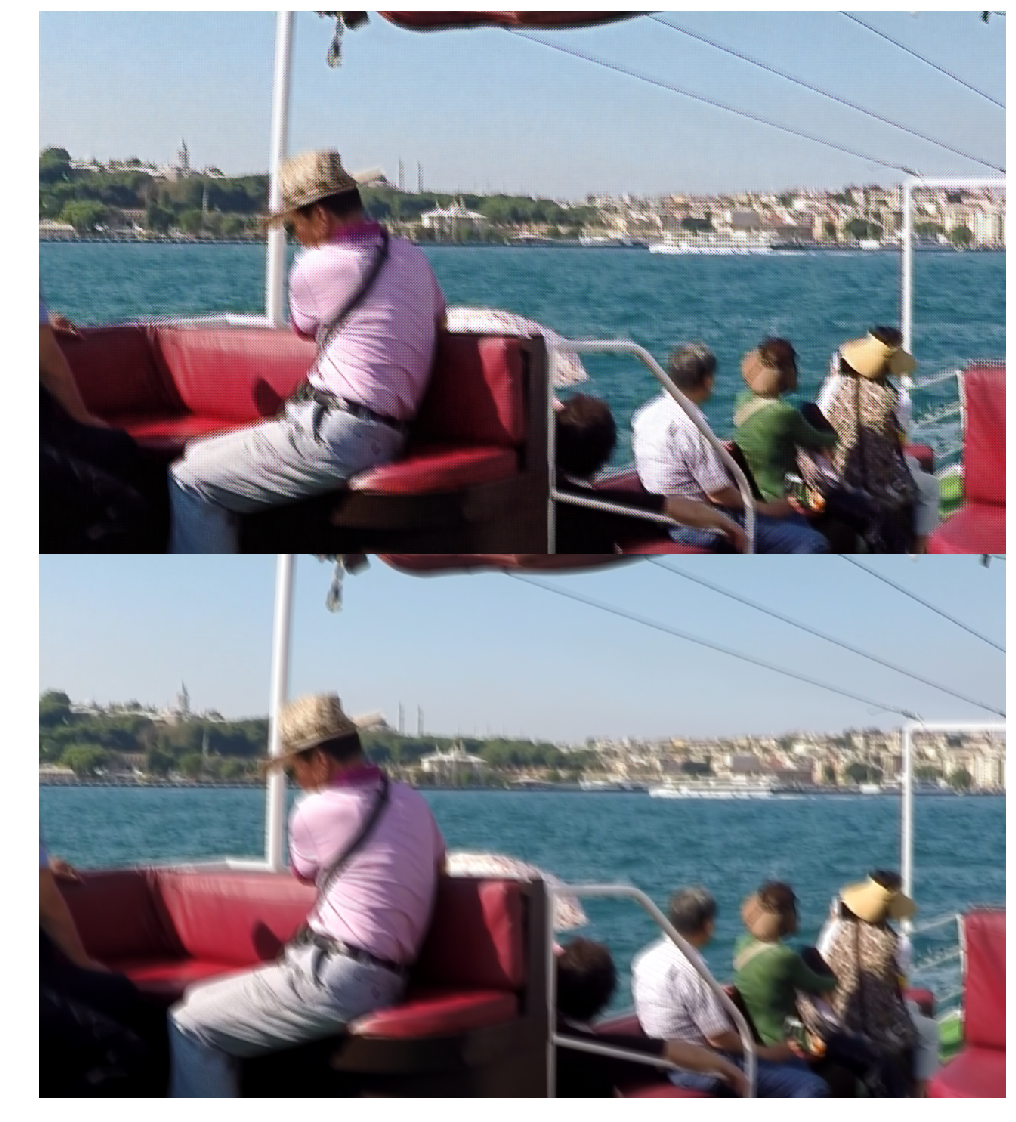

In [10]:
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img_show[0])
plt.show()

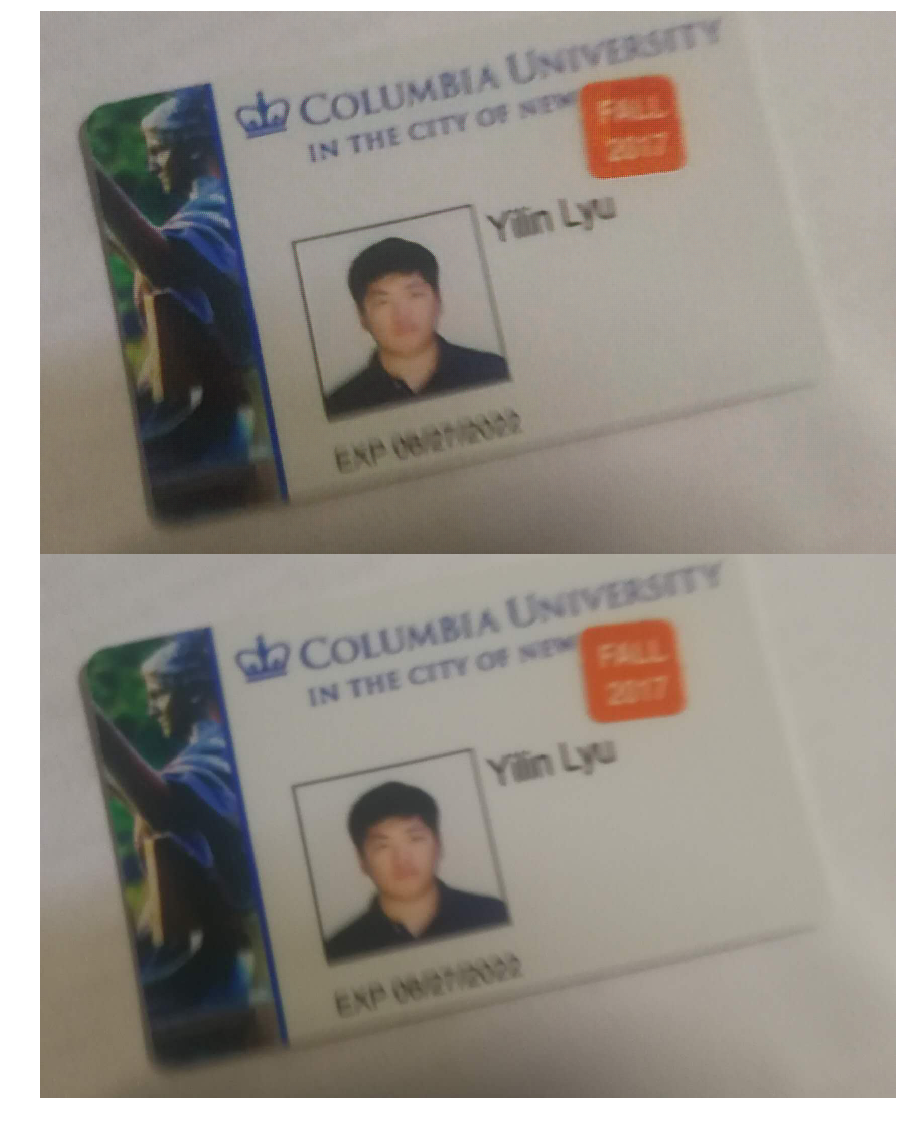

In [20]:
#Our own image
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img_show[0])
plt.show()

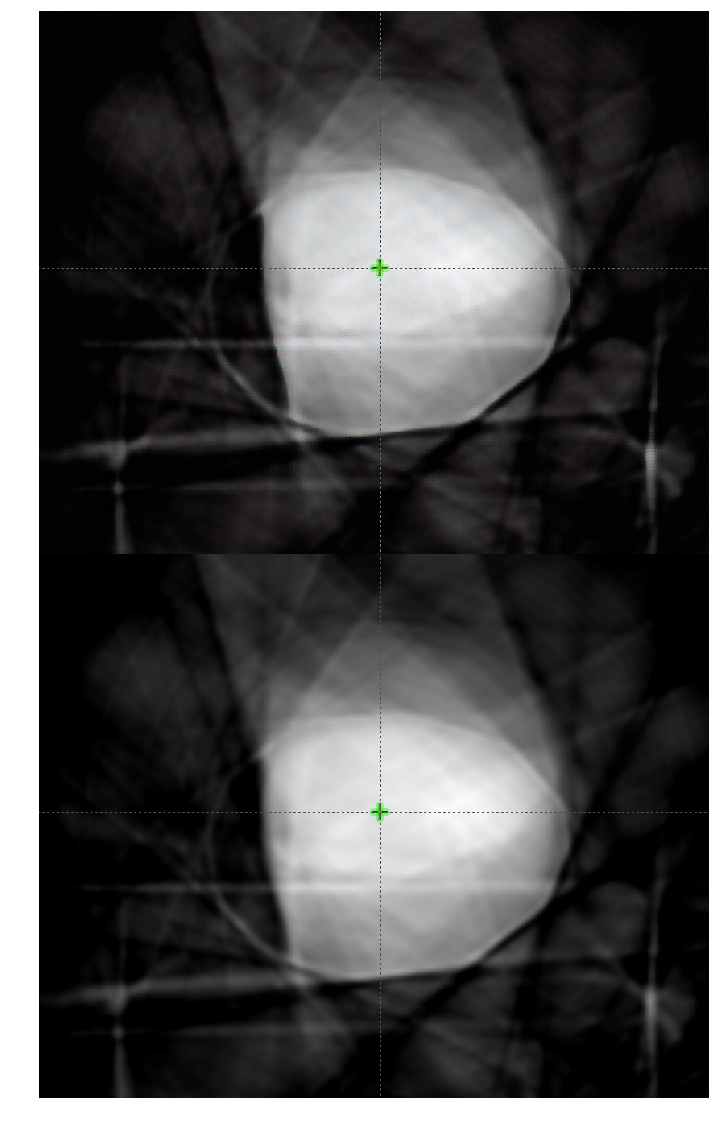

In [28]:
#Clinical image
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(img_show[0])
plt.show()